# Heart Disease Prediction
This notebook features the complete Data Science workflow for the task of 'Heart Disease Prediction'.

## Importing Libraries and Dataset

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('/content/archive (8).zip')

## Exploratory Data Analysis

In [37]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [39]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [40]:
df.isna().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


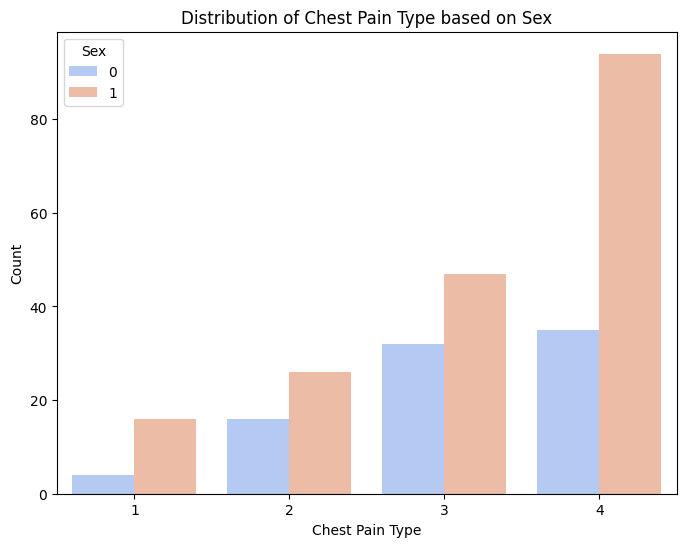

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Chest pain type', hue='Sex', palette='coolwarm')

plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Type based on Sex')
plt.show()

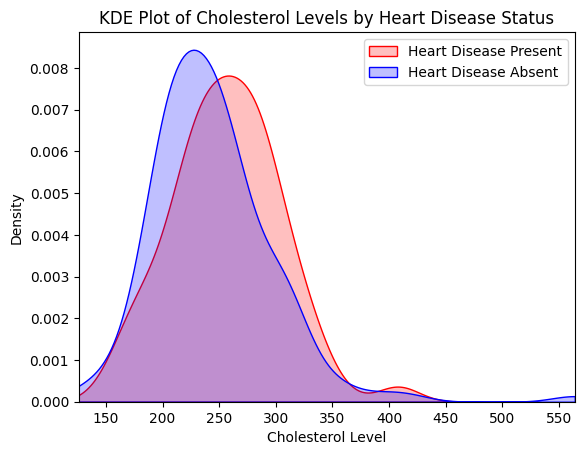

In [42]:
sns.kdeplot(
    df[df["Heart Disease"] == "Presence"]["Cholesterol"],
    label="Heart Disease Present",
    shade=True,
    color="red",
    clip=[126, 564]
)
sns.kdeplot(
    df[df["Heart Disease"] == "Absence"]["Cholesterol"],
    label="Heart Disease Absent",
    shade=True,
    color="blue",
    clip=[126, 564]
)

plt.xlim(126, 564)
plt.xlabel("Cholesterol Level")
plt.ylabel("Density")
plt.title("KDE Plot of Cholesterol Levels by Heart Disease Status")
plt.legend()
plt.show()

##  Preparing Data for Modelling

In [43]:
encoder = LabelEncoder()

In [44]:
df['Heart Disease'] = encoder.fit_transform(df['Heart Disease'])

In [45]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [46]:
X = df.drop(['Heart Disease'], axis=1)
y = df['Heart Disease']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training - (A) Decision Tree Classifier

In [48]:
dtc = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    max_leaf_nodes=9,
    min_samples_split=3
)

In [49]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=9,
                       min_samples_split=3)

In [50]:
y_pred = dtc.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')


Accuracy: 0.80, Precision: 0.78, Recall: 0.67, F1 Score: 0.72


## Model Training - (B) Logistic Regression

In [52]:
log_reg = LogisticRegression()

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [55]:
y_pred_lr = log_reg.predict(X_test_scaled)

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

print(f'Accuracy: {lr_accuracy}, Precision: {lr_precision}, Recall: {lr_recall}, F1 Score: {lr_f1}')

Accuracy: 0.9074074074074074, Precision: 0.9, Recall: 0.8571428571428571, F1 Score: 0.8780487804878049


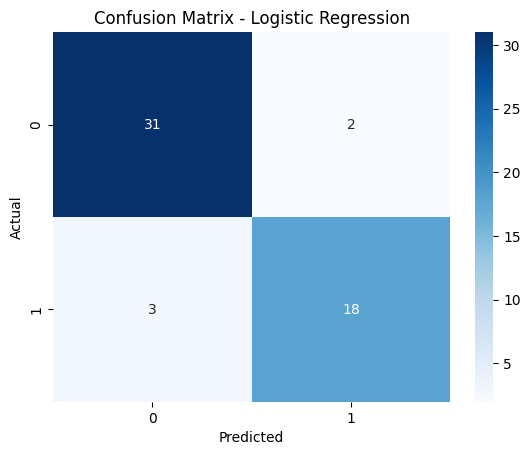

In [57]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## Performance Evaluation

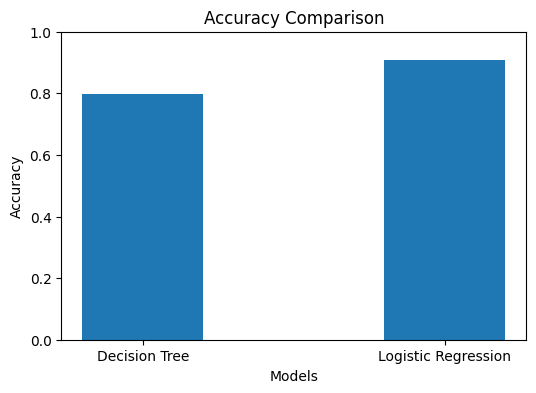

In [58]:
plt.figure(figsize=(6, 4))
plt.bar(['Decision Tree', 'Logistic Regression'], [accuracy, lr_accuracy], width=0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0.0, 1.0)
plt.show()

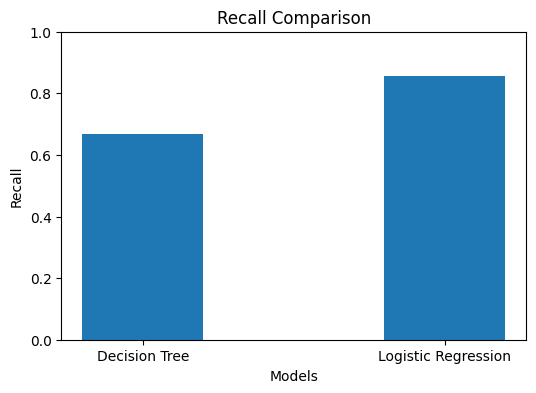

In [59]:
plt.figure(figsize=(6, 4))
plt.bar(['Decision Tree', 'Logistic Regression'], [recall, lr_recall], width=0.4)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Comparison')
plt.ylim(0.0, 1.0)
plt.show()

In [60]:
feature_imp = np.abs(log_reg.coef_[0])
feature_names = X.columns
fi_df = pd.DataFrame({ 'Feature': feature_names, 'Importance': feature_imp })
fi_df = fi_df.sort_values(by='Importance', ascending=False, ignore_index=True)

fi_df.head()

,Feature,Importance
0,Number of vessels fluro,0.839517
1,Chest pain type,0.636528
2,Sex,0.631666
3,Thallium,0.570158
4,ST depression,0.515307


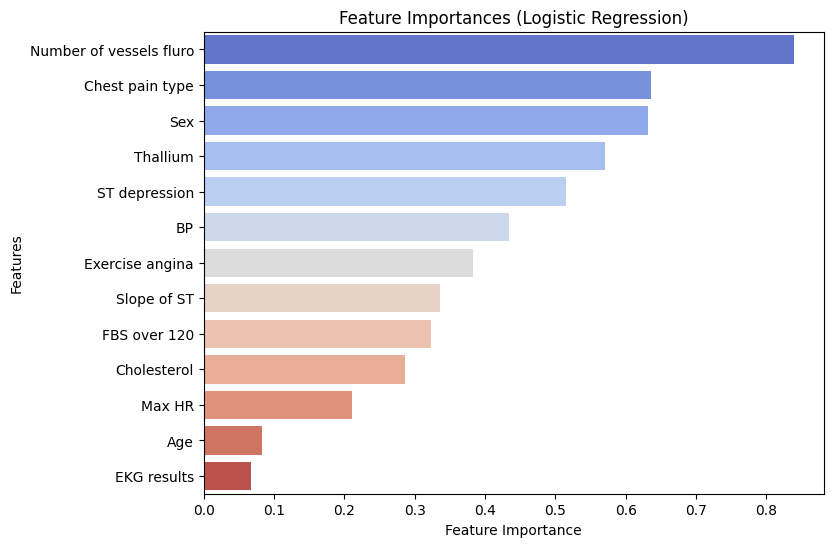

In [61]:
plt.figure(figsize=(8, 6))
sns.barplot(data=fi_df, x=fi_df['Importance'], y=fi_df['Feature'], palette='coolwarm')
plt.title('Feature Importances (Logistic Regression)')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [62]:
new_person = np.array([[55, 1, 3, 140, 230, 0, 1, 120, 0, 0.8, 1, 0, 3]])  # Example data
new_person_scaled = scaler.transform(new_person)  # Scale the input (same as training data)

prediction = log_reg.predict(new_person_scaled)[0]
probability = log_reg.predict_proba(new_person_scaled)[0, 1]

if prediction == 1:
    print(f"🚨 The model predicts that the person **HAS heart disease** (Probability: {probability:.2%})")
else:
    print(f"✅ The model predicts that the person **DOES NOT have heart disease** (Probability: {probability:.2%})")


✅ The model predicts that the person **DOES NOT have heart disease** (Probability: 21.95%)
